In [1]:
import pandas as pd
import anndata
import igraph 
import leidenalg
import scanpy as sc

In [2]:
adata = sc.read_h5ad("/mctp/share/users/gondal/01_scHLA/02_processing/ICB_Combined/new_seurat_object_update_2.h5ad")
adata

AnnData object with n_obs × n_vars = 355941 × 24370
    obs: 'cell_names', 'PMID_donor_id', 'donor_id', 'pre_post', 'cell_types', 'cell_types_update', 'outcome', 'Combined_outcome', 'cell_id', 'Cancer_type', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Sex', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank'
    obsm: 'X_umap'

In [3]:
adata

AnnData object with n_obs × n_vars = 355941 × 24370
    obs: 'cell_names', 'PMID_donor_id', 'donor_id', 'pre_post', 'cell_types', 'cell_types_update', 'outcome', 'Combined_outcome', 'cell_id', 'Cancer_type', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Sex', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank'
    obsm: 'X_umap'

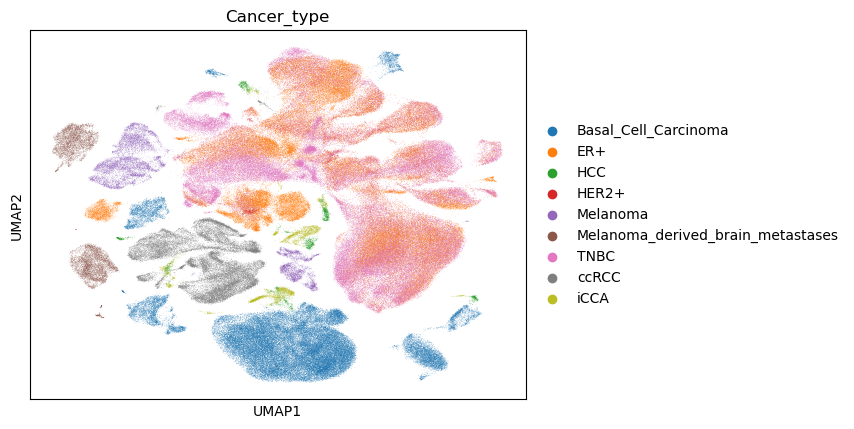

In [4]:
sc.pl.umap(adata, color='Cancer_type')  # Replace 'cell_type' with your metadata column


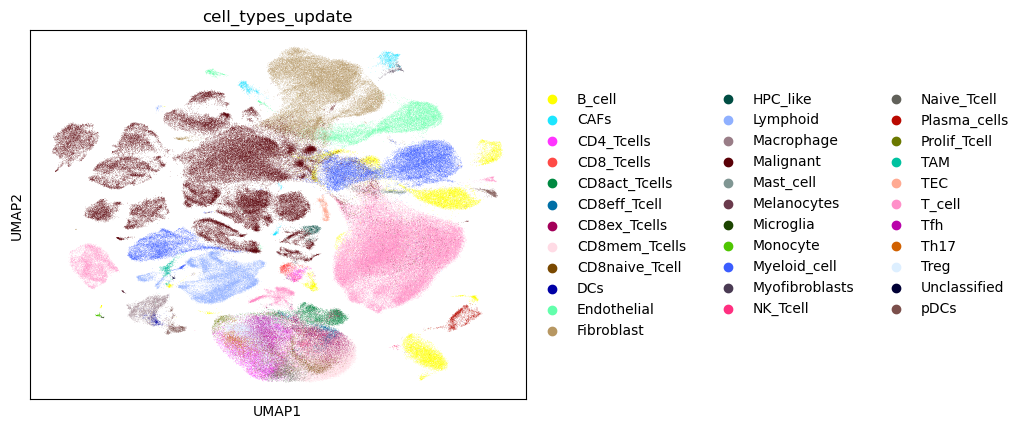

In [5]:
sc.pl.umap(adata, color='cell_types_update')  # Replace 'cell_type' with your metadata column


In [6]:
adata.obs[['development_stage_ontology_term_id','sex_ontology_term_id','self_reported_ethnicity_ontology_term_id','assay_ontology_term_id']].value_counts()

development_stage_ontology_term_id  sex_ontology_term_id  self_reported_ethnicity_ontology_term_id  assay_ontology_term_id
Unknown                             unknown               Unknown                                   EFO:0030004               293227
HsapDv:0000165                      PATO:0000383          Unknown                                   EFO:0009899                 8219
HsapDv:0000162                      PATO:0000383          Unknown                                   EFO:0009899                 7179
Unknown                             PATO:0000384          Unknown                                   EFO:0008931                 7001
HsapDv:0000152                      PATO:0000384          Unknown                                   EFO:0009899                 6258
HsapDv:0000151                      PATO:0000384          Unknown                                   EFO:0009899                 4556
Unknown                             PATO:0000383          Unknown              

In [7]:
adata

AnnData object with n_obs × n_vars = 355941 × 24370
    obs: 'cell_names', 'PMID_donor_id', 'donor_id', 'pre_post', 'cell_types', 'cell_types_update', 'outcome', 'Combined_outcome', 'cell_id', 'Cancer_type', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Sex', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank'
    uns: 'Cancer_type_colors', 'c

In [8]:
print(adata.raw.var.columns)


Index(['vf_vst_counts_mean', 'vf_vst_counts_variance',
       'vf_vst_counts_variance.expected',
       'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable',
       'vf_vst_counts_rank', 'var.features', 'var.features.rank'],
      dtype='object')


In [9]:
adata.raw.var.rename(columns={'_index': 'index'}, inplace=True)  # Change '_index' to 'index' or any other valid name


In [10]:
adata.write_h5ad("/mctp/share/users/gondal/01_scHLA/03_output/ICI_Combined_revised/version_07_10_08_24/processed_data_uc_update_2.h5ad")


In [11]:
adata.write_h5ad("/mctp/share/users/gondal/01_scHLA/03_output/ICI_Combined_revised/version_07_10_08_24/processed_data_update_2.h5ad", compression="gzip")

In [4]:
adata = sc.read_h5ad('/mctp/share/users/gondal/01_scHLA/03_output/ICI_Combined_revised/version_07_10_08_24/processed_data_uc.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 355943 × 43536
    obs: 'cell_names', 'PMID_donor_id', 'donor_id', 'pre_post', 'cell_types', 'cell_types_update', 'outcome', 'Combined_outcome', 'cell_id', 'Cancer_type', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID.x', 'PMID.y', 'Sample', 'Sex', 'Treatment.or.Mode.of.Action', 'development_stage_ontology_term_id', 'suspension_type', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'leiden'
    var: 'features'
    uns: 'Cancer_type_colors', 'cell_types_update_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata.obs

,cell_names,PMID_donor_id,donor_id,pre_post,cell_types,cell_types_update,outcome,Combined_outcome,cell_id,Cancer_type,...,PMID,Sample,Sex,Treatment.or.Mode.of.Action,development_stage_ontology_term_id,suspension_type,sex_ontology_term_id,self_reported_ethnicity_ontology_term_id,nCount_RNA,nFeature_RNA
M21_3p2_Lym_A01_S1,M21_3p2_Lym_A01_S1,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,M21_3p2_Lym_A01_S1,Melanoma_derived_brain_metastases,...,35706413,MEL021,M,interferon Alfa-2b,unknown,cell,PATO:0000384,unknown,287519.0,2778
M21_3p2_Lym_A02_S2,M21_3p2_Lym_A02_S2,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,M21_3p2_Lym_A02_S2,Melanoma_derived_brain_metastases,...,35706413,MEL021,M,interferon Alfa-2b,unknown,cell,PATO:0000384,unknown,27155.0,1235
M21_3p2_Lym_A03_S3,M21_3p2_Lym_A03_S3,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,M21_3p2_Lym_A03_S3,Melanoma_derived_brain_metastases,...,35706413,MEL021,M,interferon Alfa-2b,unknown,cell,PATO:0000384,unknown,277578.0,2984
M21_3p2_Lym_A04_S4,M21_3p2_Lym_A04_S4,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,M21_3p2_Lym_A04_S4,Melanoma_derived_brain_metastases,...,35706413,MEL021,M,interferon Alfa-2b,unknown,cell,PATO:0000384,unknown,322198.0,2993
M21_3p2_Lym_A05_S5,M21_3p2_Lym_A05_S5,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,M21_3p2_Lym_A05_S5,Melanoma_derived_brain_metastases,...,35706413,MEL021,M,interferon Alfa-2b,unknown,cell,PATO:0000384,unknown,264430.0,2633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCAGCTCAGGTGATAT,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCA...,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,bcc.su008.post.tumor.cd45_TCAGCTCAGGTGATAT,Basal_Cell_Carcinoma,...,31359002,su008,Unknown,Pembrolizumab,unknown,cell,unknown,unknown,9846.0,2370
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCCACACGTGTCCTCT,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCC...,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,bcc.su008.post.tumor.cd45_TCCACACGTGTCCTCT,Basal_Cell_Carcinoma,...,31359002,su008,Unknown,Pembrolizumab,unknown,cell,unknown,unknown,12329.0,2541
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCGGGACTCGGAGGTA,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCG...,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,bcc.su008.post.tumor.cd45_TCGGGACTCGGAGGTA,Basal_Cell_Carcinoma,...,31359002,su008,Unknown,Pembrolizumab,unknown,cell,unknown,unknown,10831.0,3241
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TGGCCAGCAATACGCT,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TGG...,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,bcc.su008.post.tumor.cd45_TGGCCAGCAATACGCT,Basal_Cell_Carcinoma,...,31359002,su008,Unknown,Pembrolizumab,unknown,cell,unknown,unknown,11793.0,3078


In [9]:
# Extract UMAP embeddings from obsm
umap_coords = adata.obsm['X_umap']

# Extract cell IDs from obs
cell_ids = adata.obs['cell_names']

# Combine UMAP coordinates and cell IDs into a DataFrame
umap_df = pd.DataFrame(umap_coords, columns=['UMAP_1', 'UMAP_2'])
umap_df['cell_id'] = cell_ids.values

# Save the DataFrame to a CSV file
umap_df.to_csv('/mctp/share/users/gondal/01_scHLA/03_output/ICI_Combined_revised/version_07_10_08_24/umap_coordinates.csv', index=False)

In [10]:
umap_df

,UMAP_1,UMAP_2,cell_id
0,-2.719466,1.093943,M21_3p2_Lym_A01_S1
1,-2.695960,0.697825,M21_3p2_Lym_A02_S2
2,-2.794993,0.449751,M21_3p2_Lym_A03_S3
3,-3.276160,0.395312,M21_3p2_Lym_A04_S4
4,-3.078309,0.398335,M21_3p2_Lym_A05_S5
...,...,...,...
355938,-0.310076,4.679035,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCA...
355939,-0.308208,4.496641,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCC...
355940,8.352202,2.489020,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCG...
355941,-0.579225,4.649842,BCC_previous_BCC_bcc.su008.post.tumor.cd45_TGG...
